In [37]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

hbar,m_e,e = 1,1,1

%matplotlib inline
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['mathtext.rm'] = 'dejavuserif'
plt.rcParams['mathtext.it'] = 'dejavuserif'
plt.rcParams['mathtext.bf'] = 'dejavuserif'

In [38]:
def coup(n,m):
    s1 = np.sin((n + m) * np.pi/2)/(n + m)**2
    s2 = np.sin((n - m) * np.pi/2)/(n - m)**2
    return s1 - s2
    
def x_nm(n,m,L):
    return 2 * L * coup(n,m) / np.pi**2

def E_n(n,L):
    return np.pi**2 * n**2 / (2 * L**2)

def omega_nm(n,m,L):
    return E_n(n,L) - E_n(m,L)

# ******************************************** #

def alpha(q,E0,x_nm):
    return -q * E0 * x_nm

def R_Omega(det,alpha):
    return np.sqrt(det**2 + alpha**2)

In [39]:
# RWA transition probabilities

def prob_1(t,det,alpha_nm):
    p1_1 = np.cos(R_Omega(det,alpha_nm)*t/2)**2
    p1_2 = np.sin(R_Omega(det,alpha_nm)*t/2)**2 * det**2 / R_Omega(det,alpha_nm)**2
    
    return p1_1 + p1_2

def prob_2(t,det,alpha_nm):
    
    return np.sin(R_Omega(det,alpha_nm)*t/2)**2 * alpha_nm**2 / R_Omega(det,alpha_nm)**2

In [58]:
# noRWA coeff diff eq

def c1_dot(t,c2,omega_0,omega_E,alpha):
    return c2 * np.exp(-1j * omega_0 * t) * np.cos(omega_E * t) * alpha / 1j

def c2_dot(t,c1,omega_0,omega_E,alpha):
    return c1 * np.exp(1j * omega_0 * t) * np.cos(omega_E * t) * alpha / 1j

def ode_syst(y,t,params):
    c1,c2 = y
    omega_0,omega_E,alpha = params
    
    diffs = np.array([c1_dot(t,c2,omega_0,omega_E,alpha),c2_dot(t,c1,omega_0,omega_E,alpha)],dtype='complex_')
    0
    return diffs

def noRWA_int(n1,n2,det,q,E0,L,t_lim):
    
    omega_n2n1 = omega_nm(n2,n1,L)
    x_n2n1 = x_nm(n1,n2,L)
    alpha_n2n1 = alpha(q,E0,x_n2n1)
    omega_E = omega_n2n1 + det
    
    y0 = np.array([1,0],dtype='complex_')
    params = np.array([omega_n2n1,omega_E,alpha_n2n1],dtype='complex_')
    t = np.linspace(0,t_lim,1000)
    
    return odeint(ode_syst, y0, t, args=(params,))

In [59]:
# for ground and 1st exited state

q,E0,L = 1,0.1,10

x_21 = x_nm(1,2,L)

w_21 = omega_nm(2,1,L)

alpha_21 = alpha(q,E0,x_21)

Text(0.5, 1.0, 'Inversión de población')

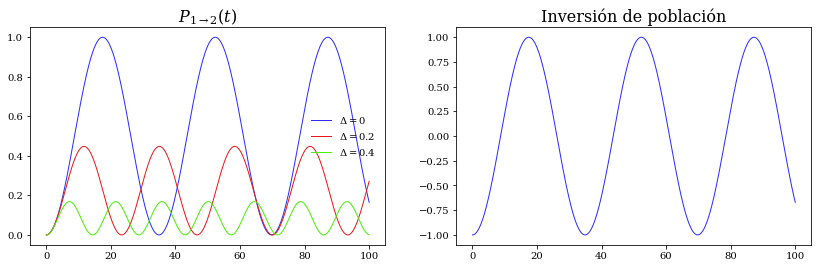

In [60]:
t = np.linspace(0,100,1000) #t scale: 2.41888e-17 s

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,4))

ax1.plot(t,prob_2(t,0,alpha_21),color='#2a2ef6',linewidth=1,label=r'$\Delta = 0$')
ax1.plot(t,prob_2(t,0.2,alpha_21),color='#e91717',linewidth=1,label=r'$\Delta = 0.2$')
ax1.plot(t,prob_2(t,0.4,alpha_21),color='#48ef06',linewidth=1,label=r'$\Delta = 0.4$')

ax1.set_title(r'$P_{1 \rightarrow 2}(t)$',fontsize=16)

ax1.legend(frameon=False)

ax2.plot(t,prob_2(t,0,alpha_21)-prob_1(t,0,alpha_21),color='#2a2ef6',linewidth=1)

ax2.set_title(r'Inversión de población',fontsize=16)

In [61]:
q,E0,L = 1,0.1,10
t_lim = 100

noRWA_int(1,2,0,q,E0,L,t_lim)

TypeError: Cannot cast array data from dtype('complex128') to dtype('float64') according to the rule 'safe'